# Contents
1. [Project Objectives](#1.-Project-Objectives) <br>
2. [What is the Online Shopper's Intention dataset about?](#2.-What-is-the-Online-Shopper's-Intention-dataset-about?)<br>
3. [Read Data](#3.-Read-Data) <br>
4. [Methodology](#4.-Methodology) <br>
a. [Explanation of attributes](#a.-Explanation-of-attributes) <br> 
b. [Data Cleaning](#b.-Data-Cleaning) <br>
c. [Feature Selection](#c.-Feature-Selection) <br>
d. [K-means clustering](#d.-K\-means-clustering) <br>
e. [Additional Analysis](#e.-Additional-Analysis) <br>
5. [Insight](#5.-Insight) <br> 

# 1. Project Objectives

The purpose of this project is to use clustering to identify segments of customers, customer behaviour for online shopping,  and carry out additional analysis whenever needed.

# 2. What is the Online Shopper's Intention dataset about?
The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

# 3. Read Data 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('ggplot')

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [2]:
shopper = pd.read_csv('Final Project Clean.csv')
shopper.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,11248.000000,11248.000000,11248.00000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000
mean,2.060900,70.976554,0.40425,25.529287,23.404161,798.703364,0.021622,0.043244,5.844530,0.063371,2.122333,2.357752,3.174431,4.115309
std,2.990327,153.786119,1.08650,113.141315,23.353383,798.438874,0.047043,0.047608,18.712484,0.201292,0.921844,1.725040,2.406050,4.036217
min,0.000000,-1.000000,0.00000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.00000,0.000000,7.000000,170.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,3.000000,0.00000,0.000000,16.000000,529.416667,0.002235,0.026433,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,3.000000,83.000000,0.00000,0.000000,32.000000,1204.890179,0.017857,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,24.000000,2156.166667,16.00000,2252.033333,223.000000,3401.300000,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Below we carry out an important and necessary step to change the boolean variable ``Revenue`` to its numerical form, using label encoding.

In [3]:
# label encoding of revenue

from sklearn.preprocessing import LabelEncoder

laben = LabelEncoder()
shopper['Revenue'] = laben.fit_transform(shopper['Revenue'])
shopper['Revenue'].value_counts()

0    9629
1    1619
Name: Revenue, dtype: int64

# 4. Methodology

## a. Explanation of attributes

3 page types and the duration spent on each page
- Administrative 
- Administative_Duration 
<br>

- Informational 
- Informational_Duration
<br> 
<br>
- ProductRelated 
- ProductRelated_Duration

<b>Metric Attributes</b>
- BounceRates (enter and leave without interaction)
- ExitRates (% that were last in the session) 
- PageValues (average value for a web page that user visited before completing transaction) 

In [4]:
minmax = pd.DataFrame(shopper.iloc[:, list(range(10))].min())
minmax['Max'] = shopper.iloc[:, list(range(10))].max()
minmax.columns = ['Min', 'Max']
minmax

,Min,Max
Administrative,0.0,24.000000
Administrative_Duration,-1.0,2156.166667
Informational,0.0,16.000000
Informational_Duration,-1.0,2252.033333
ProductRelated,0.0,223.000000
ProductRelated_Duration,-1.0,3401.300000
BounceRates,0.0,0.200000
ExitRates,0.0,0.200000
PageValues,0.0,361.763742
SpecialDay,0.0,1.000000


Above shows the maximum and minimum values of the numerical variables in the dataset. From what we can observe, there are a few columns with -1 that needs to be replaced or removed.

<b>Time of Visits</b>
- <b>SpecialDay</b> (measures the closeness of the date to a specific holiday/celebration from 0 to 1)
- <b>Month</b> (Which month?)
- <b>Weekend</b> (Does it fall on a weekend?) 

<b>Demographics</b>
- <b>OperatingSystems</b> (what OS does it run on?)
- <b>Browser</b> (what browser does it use?)
- <b>Region</b> (which region does the user come from?)
- <b>TrafficType</b> (direct, referring, search engine? Where was the user linked from?)
- <b>VisitorType</b> (Returning or New Visitor?)

<b>Results or Target Variable</b> 
- <b>Revenue</b> (did it make money?) 

## b. Data Cleaning

Checking the shape of the dataset

In [5]:
shopper.shape

(11248, 18)

<font color=blue>we replace all the -1 values.

In [17]:
shopper['Administrative_Duration'] = shopper['Administrative_Duration'].replace(-1, np.nan)
shopper['Informational_Duration'] = shopper['Informational_Duration'].replace(-1, np.nan)
shopper['ProductRelated_Duration'] = shopper['ProductRelated_Duration'].replace(-1, np.nan)
shopper = shopper.dropna(axis=0, how='any')
shopper.shape

(11215, 18)

## c. Feature Selection

<font color=blue>In order to focus on our target variable: Revenue, we first isolate the numerical variables into a dataframe called ``num_df``

In [6]:
num_df = shopper.iloc[:, list(range(10))]
num_df['Revenue'] = shopper['Revenue']
num_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0
2,0,-1.0,0,-1.0,1,-1.000000,0.20,0.20,0.0,0.0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,0


>><font color=blue>Correlation states how the features are related to each other or the target variable.<br>
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)<br>
<b>Plotting a correlation matrix with heatmap makes it easy to identify which features are most related to the target variable. </b>

In [8]:
num_df_corr = num_df.corr()
num_df_corr
highlight = num_df_corr.round(2).style.background_gradient(cmap='coolwarm')
highlight

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
Administrative,1.000000,0.600000,0.320000,0.210000,0.370000,0.320000,-0.220000,-0.310000,0.100000,-0.110000,0.110000
Administrative_Duration,0.600000,1.000000,0.240000,0.150000,0.210000,0.250000,-0.140000,-0.210000,0.070000,-0.080000,0.080000
Informational,0.320000,0.240000,1.000000,0.610000,0.260000,0.260000,-0.100000,-0.150000,0.050000,-0.040000,0.080000
Informational_Duration,0.210000,0.150000,0.610000,1.000000,0.160000,0.180000,-0.070000,-0.090000,0.040000,-0.030000,0.060000
ProductRelated,0.370000,0.210000,0.260000,0.160000,1.000000,0.770000,-0.260000,-0.380000,0.100000,-0.000000,0.130000
ProductRelated_Duration,0.320000,0.250000,0.260000,0.180000,0.770000,1.000000,-0.270000,-0.380000,0.120000,-0.040000,0.160000
BounceRates,-0.220000,-0.140000,-0.100000,-0.070000,-0.260000,-0.270000,1.000000,0.900000,-0.120000,0.090000,-0.140000
ExitRates,-0.310000,-0.210000,-0.150000,-0.090000,-0.380000,-0.380000,0.900000,1.000000,-0.170000,0.120000,-0.200000
PageValues,0.100000,0.070000,0.050000,0.040000,0.100000,0.120000,-0.120000,-0.170000,1.000000,-0.060000,0.520000
SpecialDay,-0.110000,-0.080000,-0.040000,-0.030000,-0.000000,-0.040000,0.090000,0.120000,-0.060000,1.000000,-0.080000


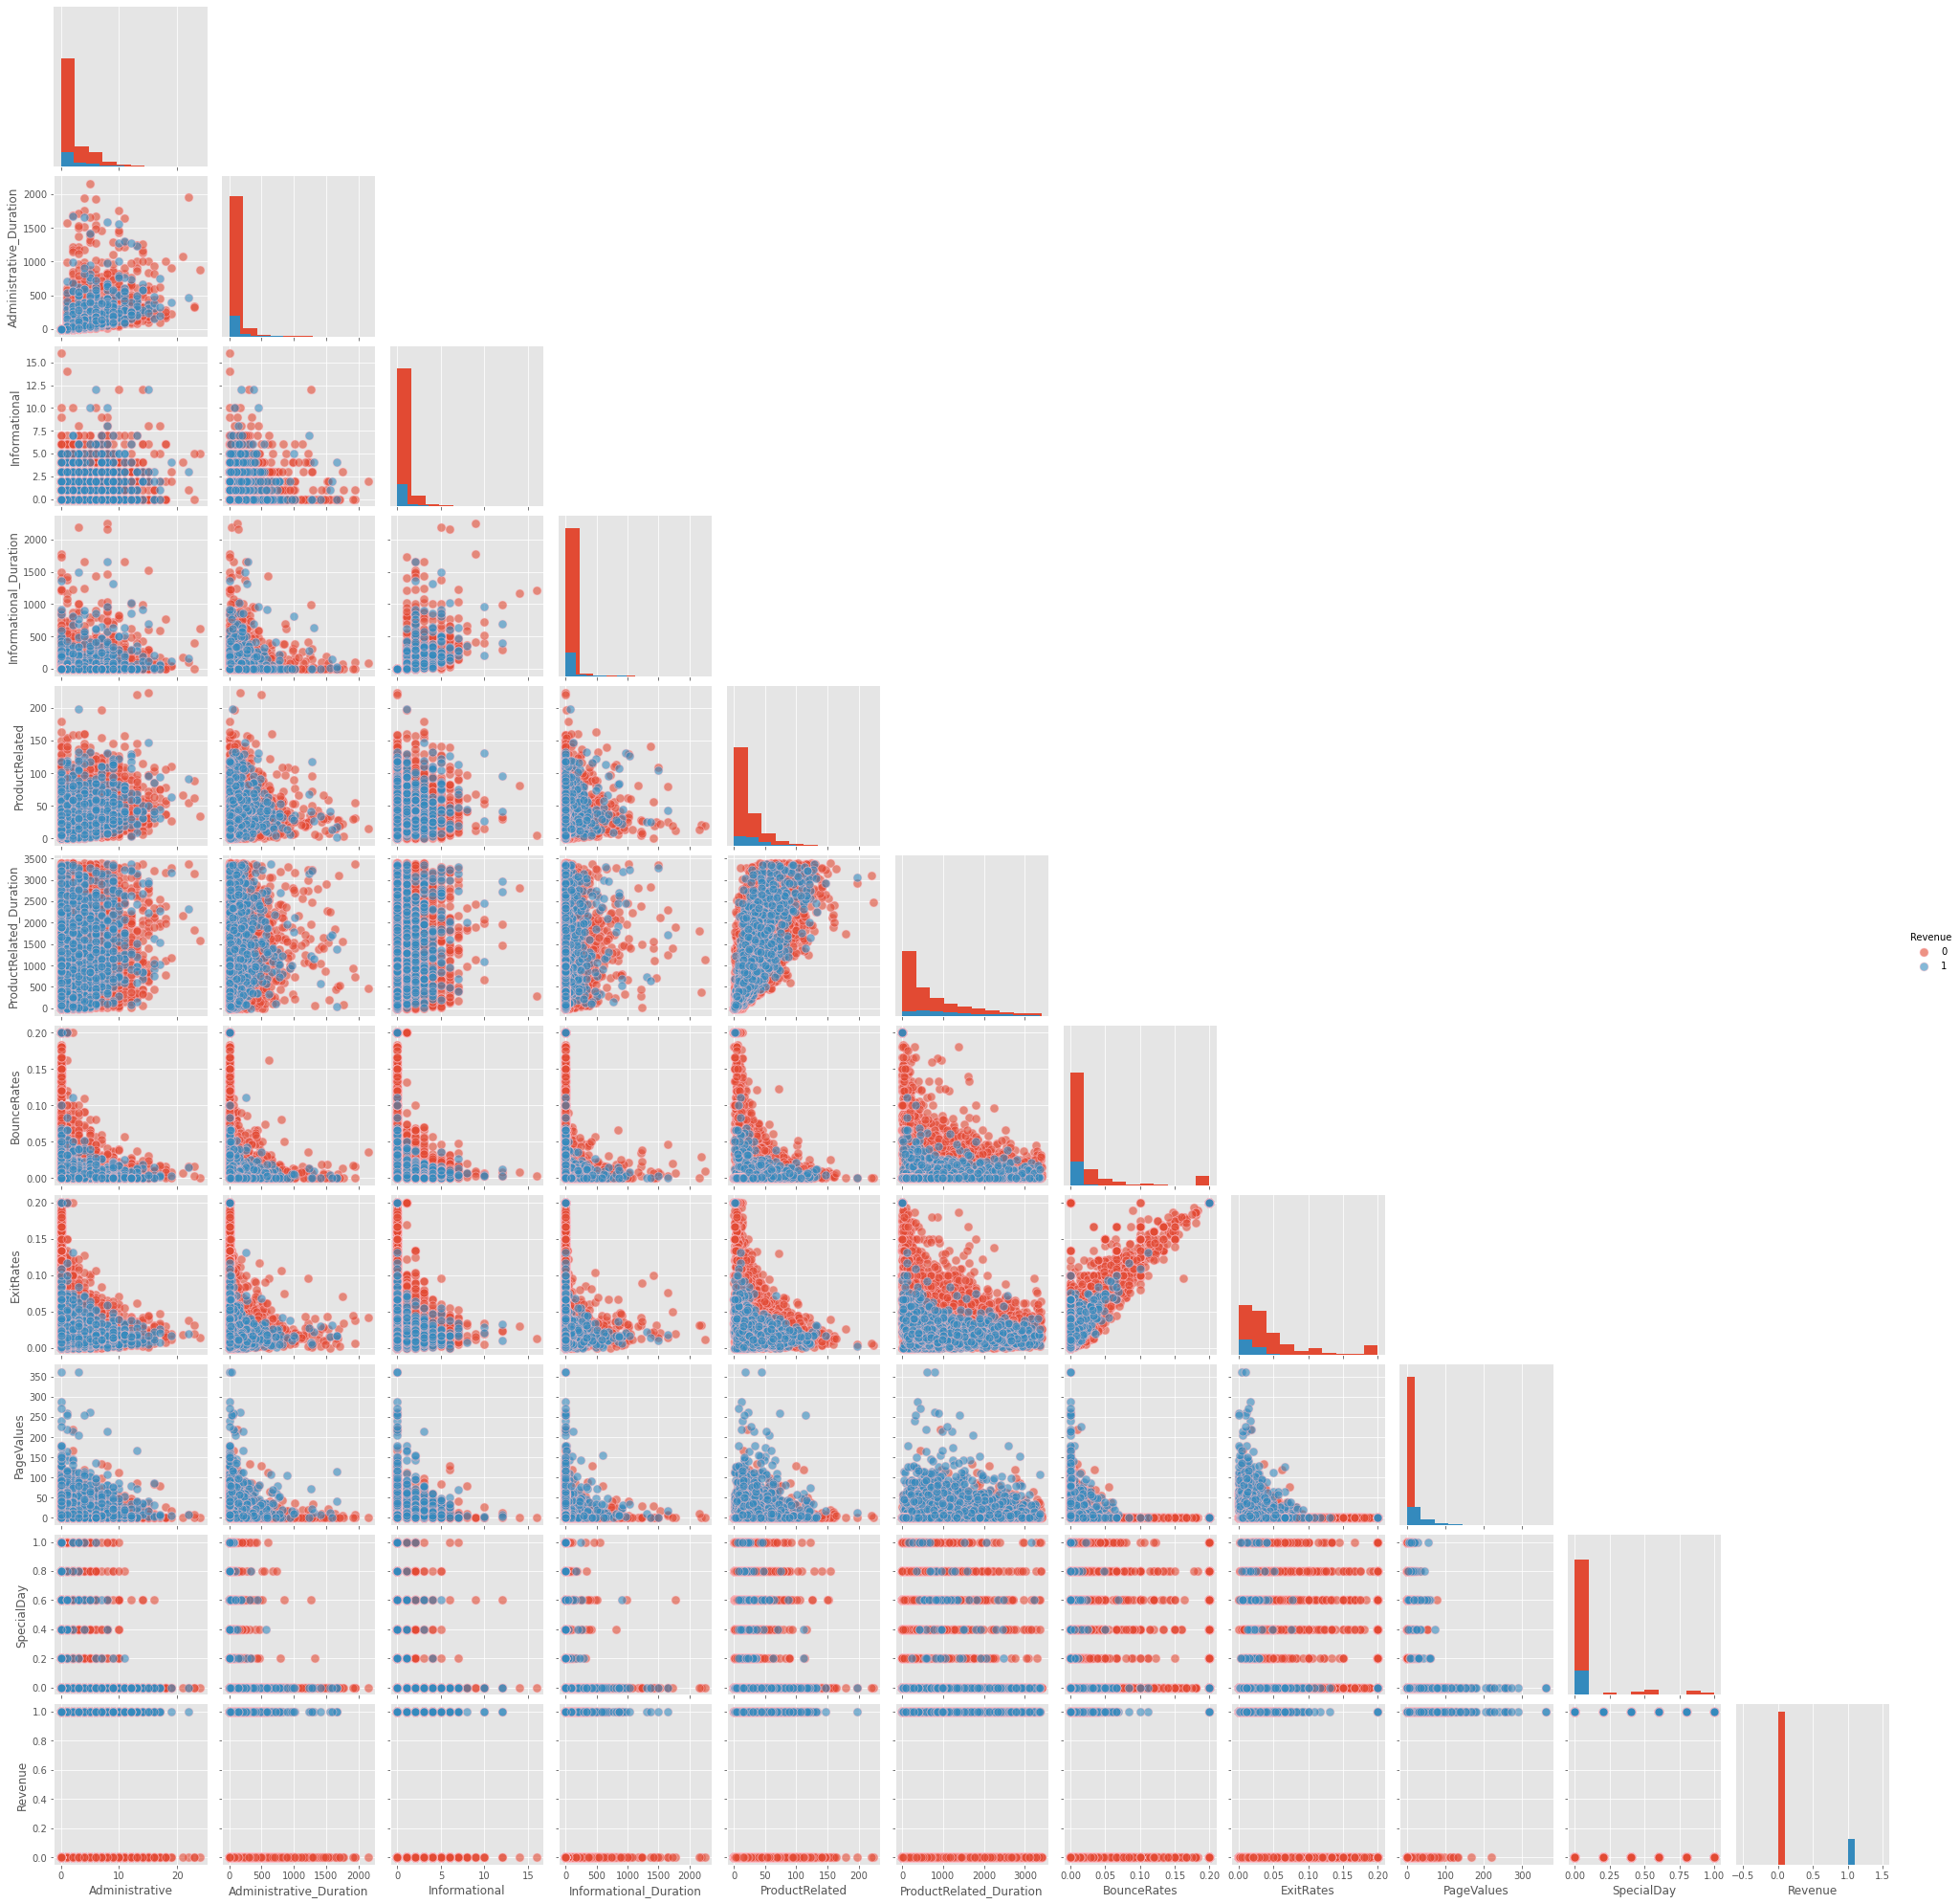

In [9]:
g = sns.pairplot(shopper
                 ,vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration','ProductRelated', 'ProductRelated_Duration','BounceRates','ExitRates','PageValues', 'SpecialDay', 'Revenue']
                 ,hue = 'Revenue'
                 ,diag_kind = 'hist'
                 ,plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'pink'}
                 ,corner=True)

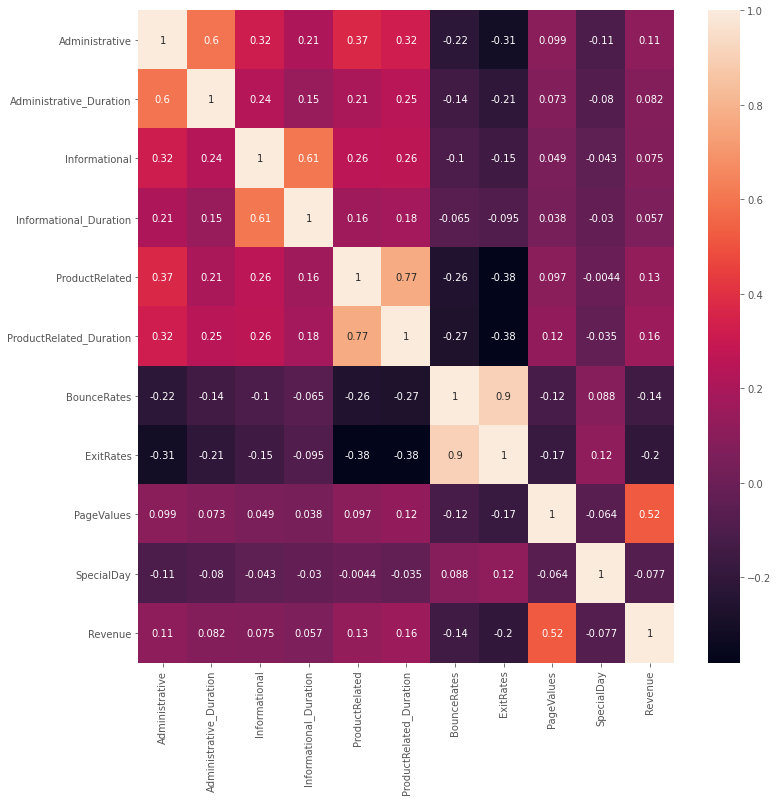

In [12]:
plt.figure(figsize = (12,12))
sns.heatmap(num_df.corr('pearson'), annot = True)
plt.show()

>><font color=blue> <b>Here we can infer that </b>``ExitRates`` <b>has strong positive correlation with</b> ``BounceRates`` <b>at 0.90.</b><br>
The 3 page types and their duration have positive strong correlation. <br>
As expected, page value is highly correlated with revenue output at 0.52. <br> 

<font color=green>Another method of feature selection is using <b>SelectKBest</b> from the scikit learn library. It selects the features according to the k best scores. The feature with the <b>highest score ranks as the most significant feature.</b>  

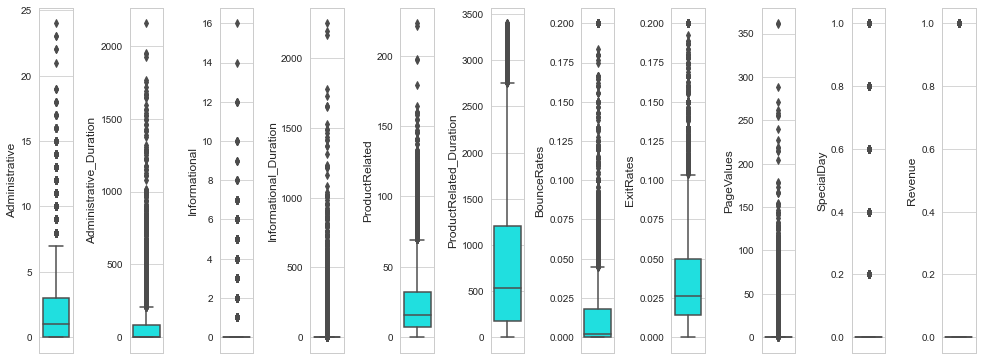

In [27]:
l = num_df.columns.values
col = 11
rows = len(l)-1/col
plt.figure(figsize=(1.25 * col, 5 * rows))
for i in range(0,len(l)):
    plt.subplot(rows + 1, col, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(num_df[l[i]],color='cyan',orient='v')
    plt.tight_layout()

<font color=blue>All columns show outliers

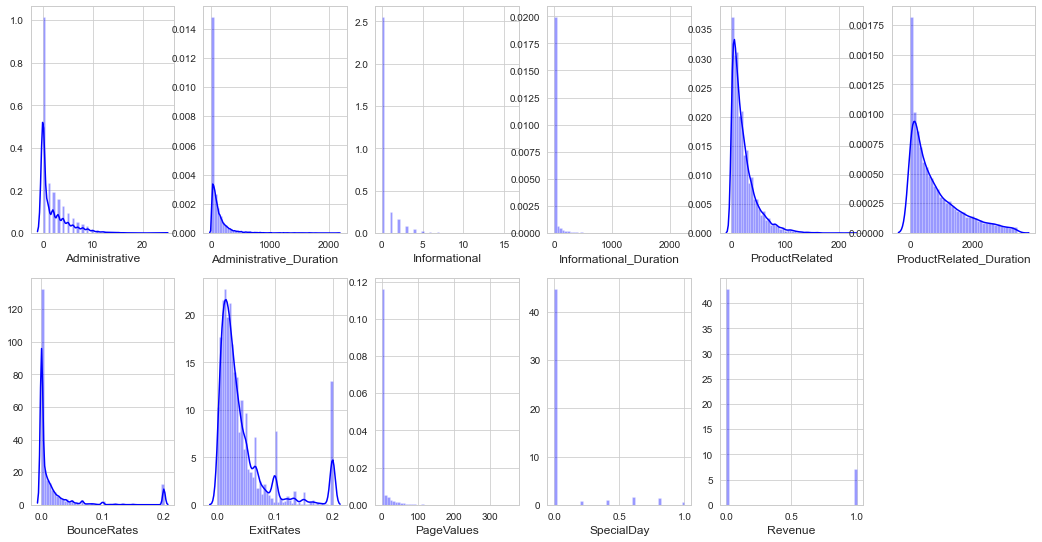

In [25]:
col = 6
rows = len(l)-1/col
plt.figure(figsize=(3 * col,5 * rows))
for i in range(0,len(l)):
    plt.subplot(rows + 1,col, i+1)
    sns.distplot(num_df[l[i]],kde=True, color='blue') 

>><font color=blue>Most columns appear to be right skewed.

## K-means clustering

Berdasarkan hasil yang sudah kita dapatkan dari feature selection, kita mengetahui bahwa faktor yang signifikan mempengaruhi niat customer untuk melakukan purchase/tidak adalah berapa lama (durasi) customer itu sendiri stay/mengahbiskan waktu di dalam page tersebut. untuk mengetahui lebih lanjut, yuk kita cek produk/items yang dapat kita lihat mempengaruhi lamanya customer stay di page tersebut.

## Clustering Analysis

## Trying to learn the user characteristics of in terms of time spent on the Website

**1. Administrative Duration vs Bounce Rate**

**The Elbow Method to Find out the Maximum no. of Optimal Clusters**

> Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from   1 to 10 clusters.

> For each k, calculate the total within-cluster sum of square (wss).

> Plot the curve of wss according to the number of clusters k.

> The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

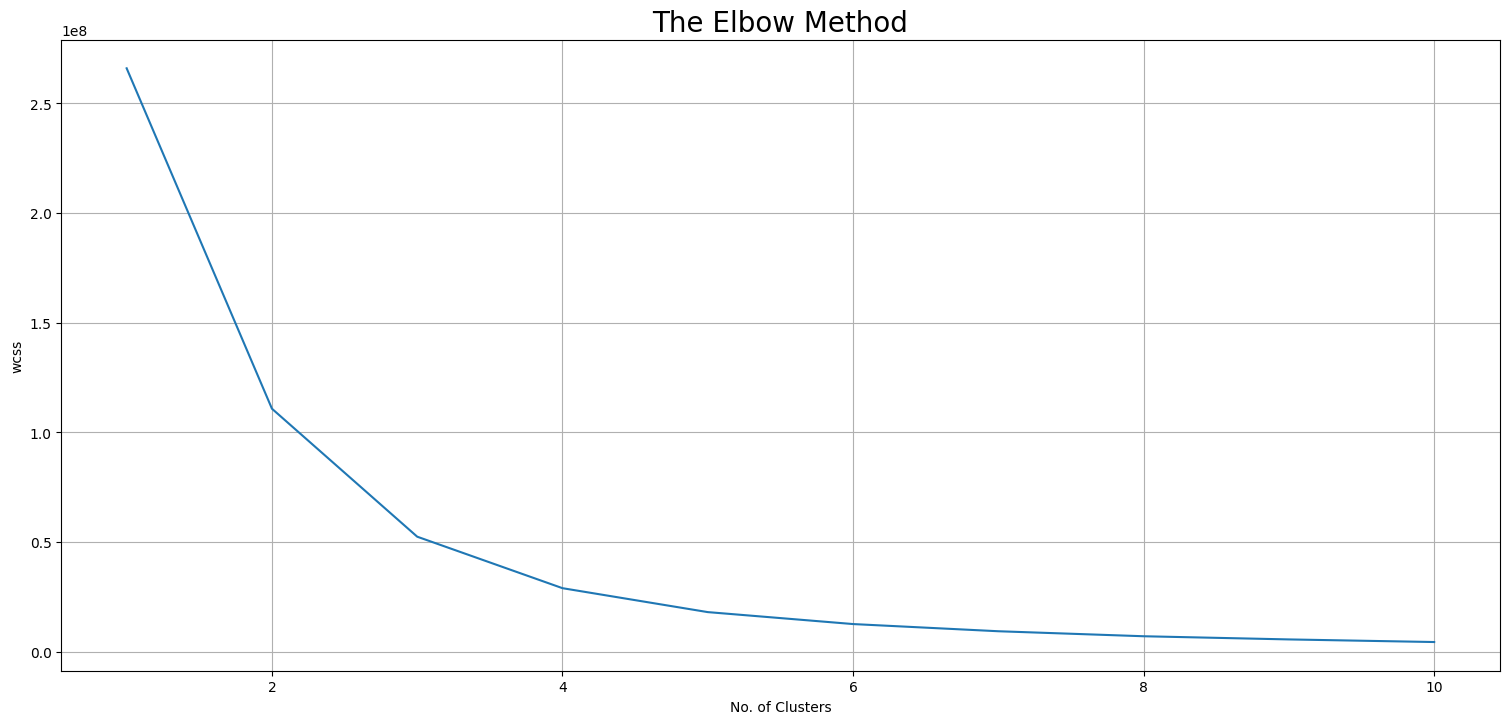

In [69]:
# Q1: Time Spent by The Users on Website vs Bounce Rates

'''
Bounce Rate :The percentage of visitors to a particular website who navigate away from the site after 
viewing only one page.
'''
# let's cluster Administrative duration and Bounce Ratw to different types of clusters in the dataset.
# preparing the dataset
x = shopper.iloc[:, [1, 6]].values

# checking the shape of the dataset
x.shape


from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

>>**According to this plot, the maximum bend is at third index, that is the number of Optimal no. of Clusters for Adminstrative Duration and Revenue is Three.
Let's go to the next step, i.e., Plotting the Clusters.**

## Visualizing the Cluster using Scatter Plot

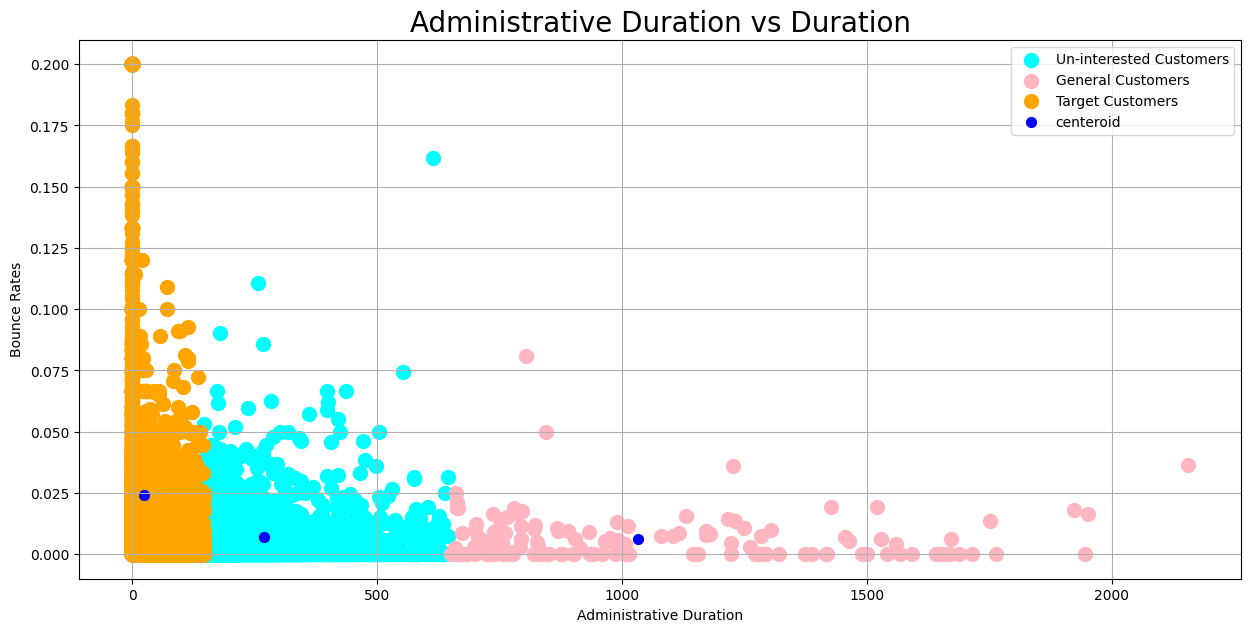

In [70]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'cyan', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'lightpink', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'orange', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

>>**By,  Looking at this Clustering plot, we can say confindently say that the customers who spent a longer administrative duration in a website are very less likely to bounce from the website that is navigating away from the website just after navigating one page of that website.**

>>**There are Three Groups, The 'cyan' Group is a group of customers who stay for shortest adminstrative duration and have highest chance for Navigating away from a website**

### 2. Informative Duration vs Bounce Rates

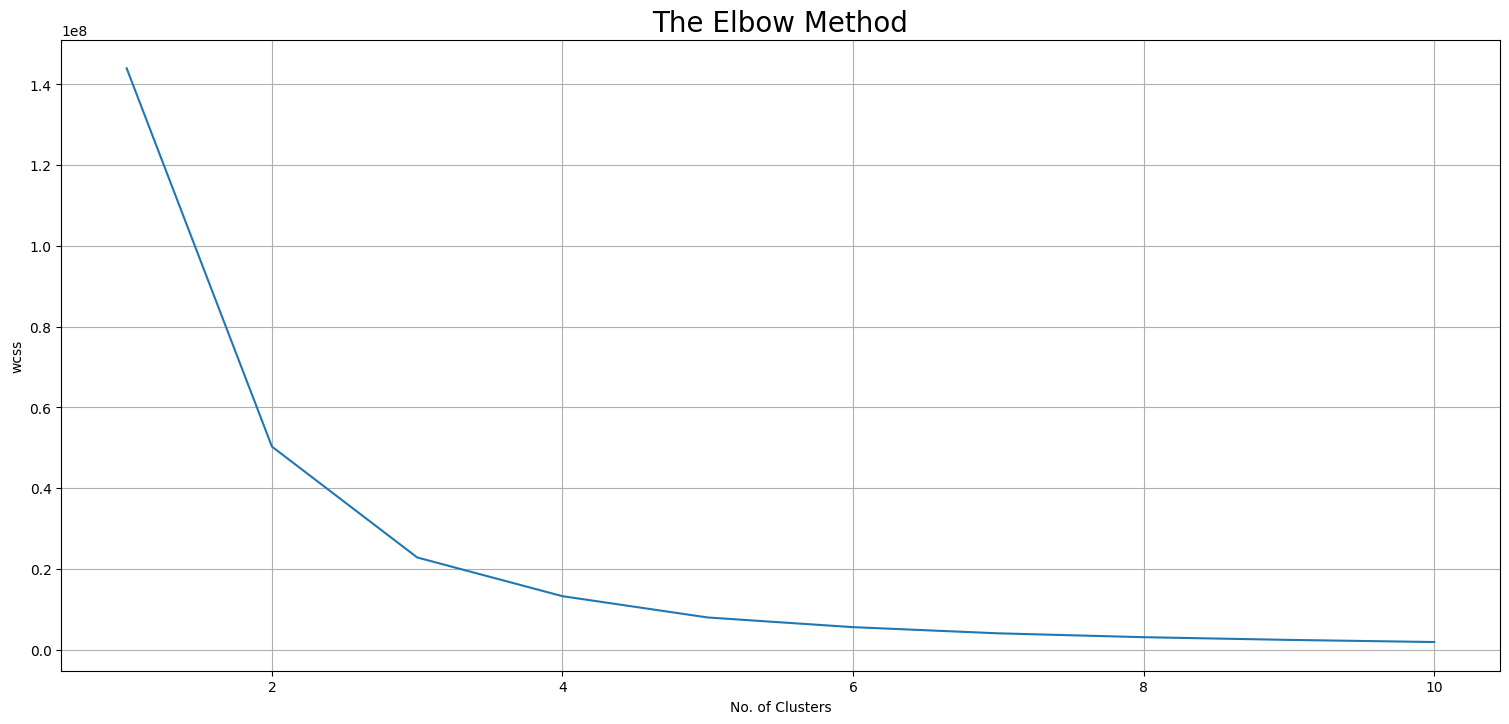

In [71]:
# informational duration vs Bounce Rates
x = shopper.iloc[:, [3, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

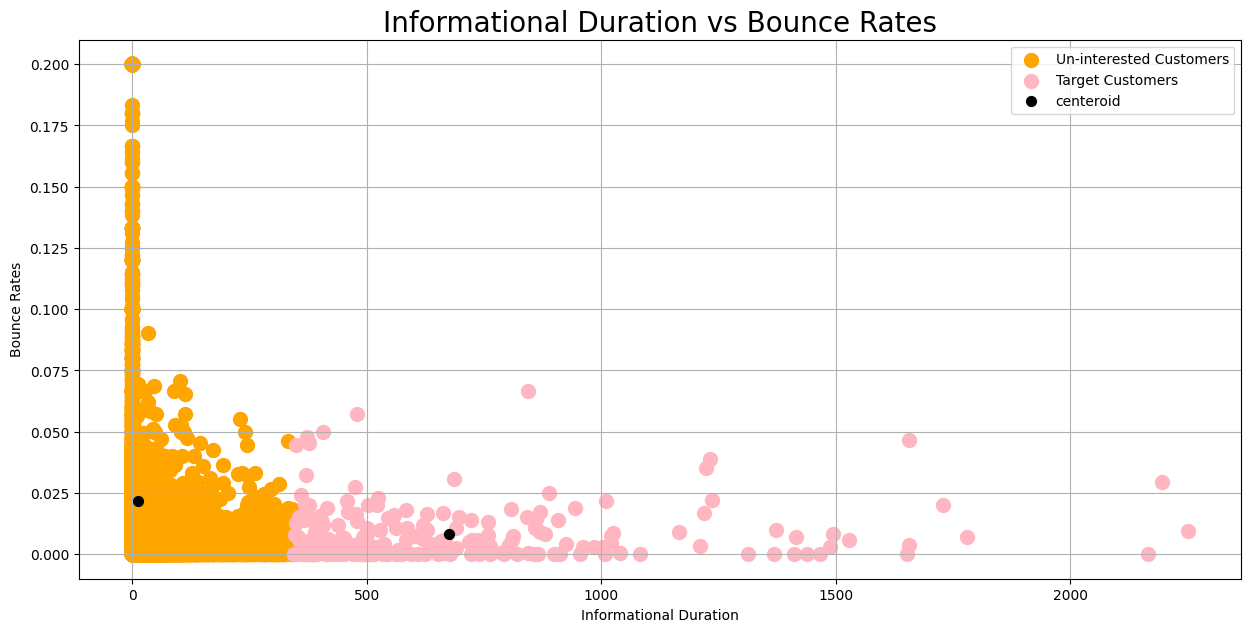

In [75]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'orange', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'lightpink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'k' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

### 3.Administrative Duration vs Exit Rates

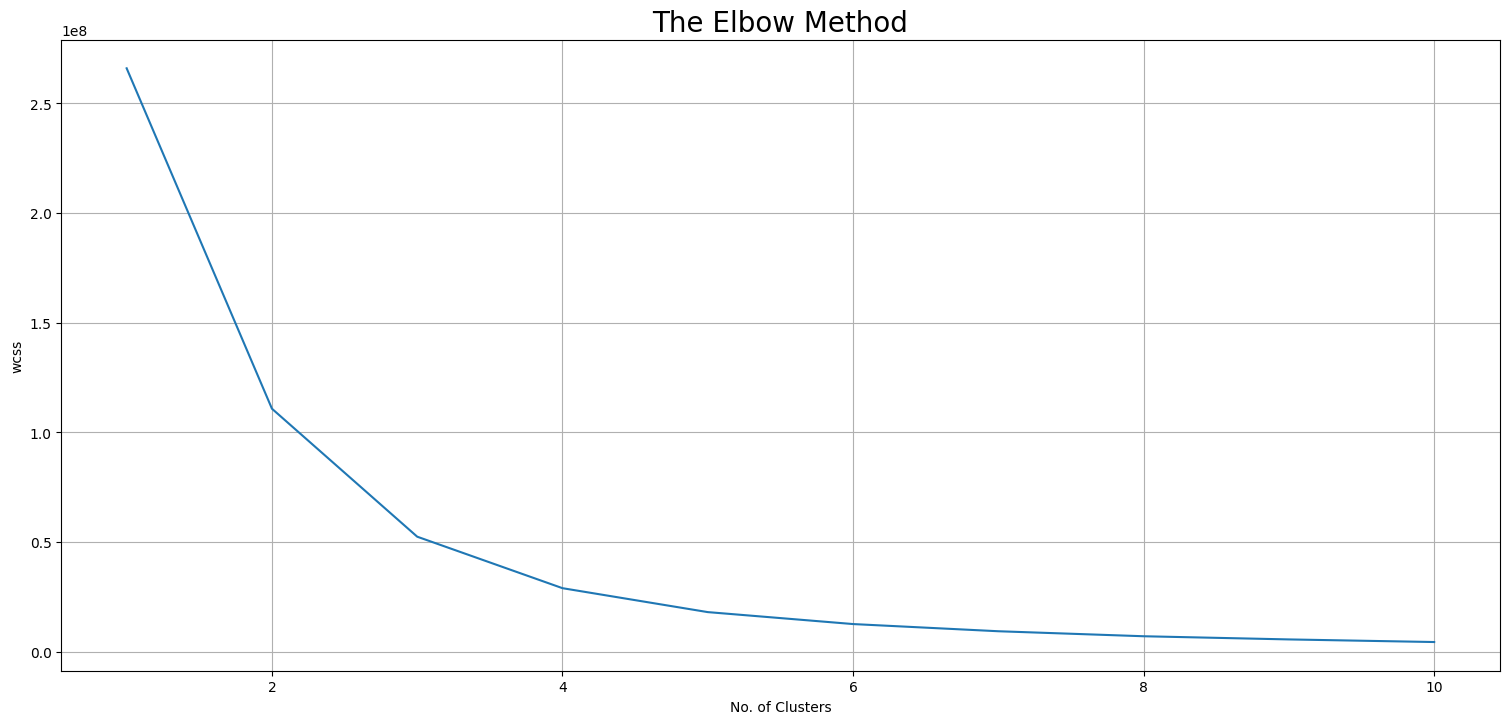

In [76]:
# informational duration vs Bounce Rates
x = shopper.iloc[:, [1, 7]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

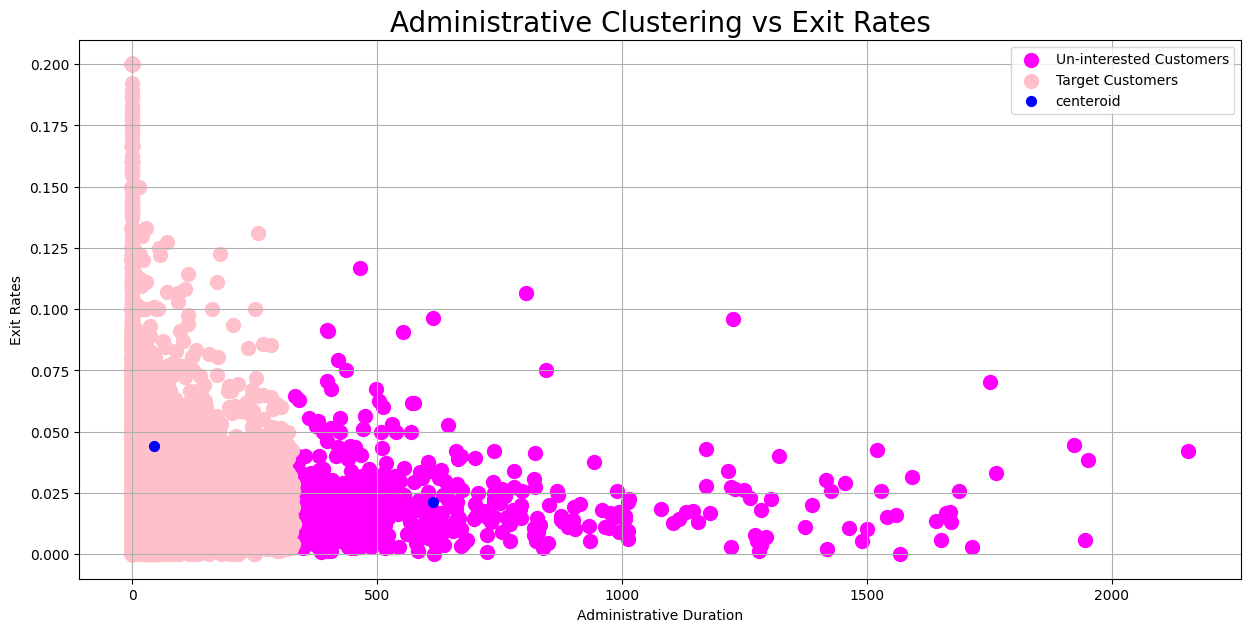

In [78]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'magenta', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'pink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Clustering vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()

## Where from the Users of the Website come?

### 1. Region vs Traffic Type

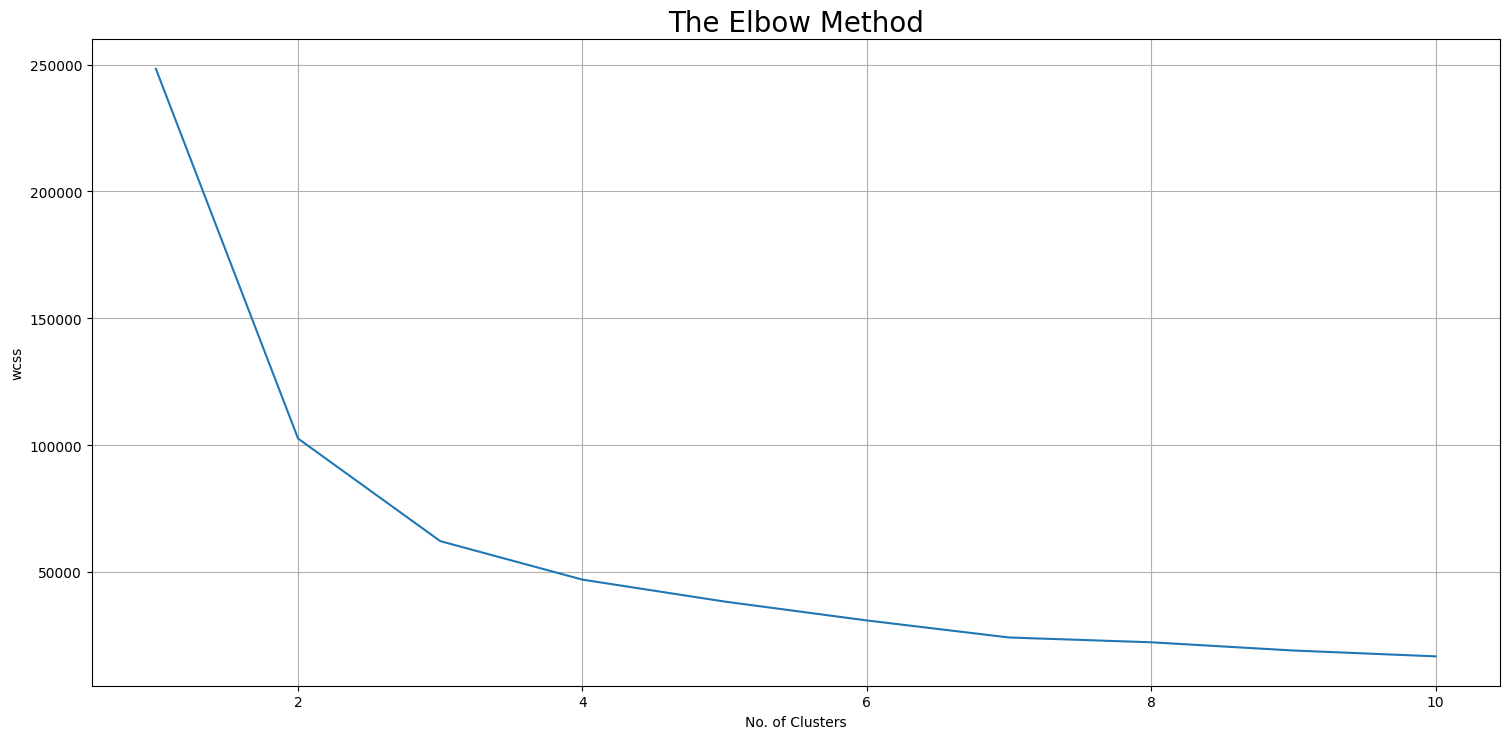

In [79]:
# informational duration vs Bounce Rates
x = shopper.iloc[:, [13, 14]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

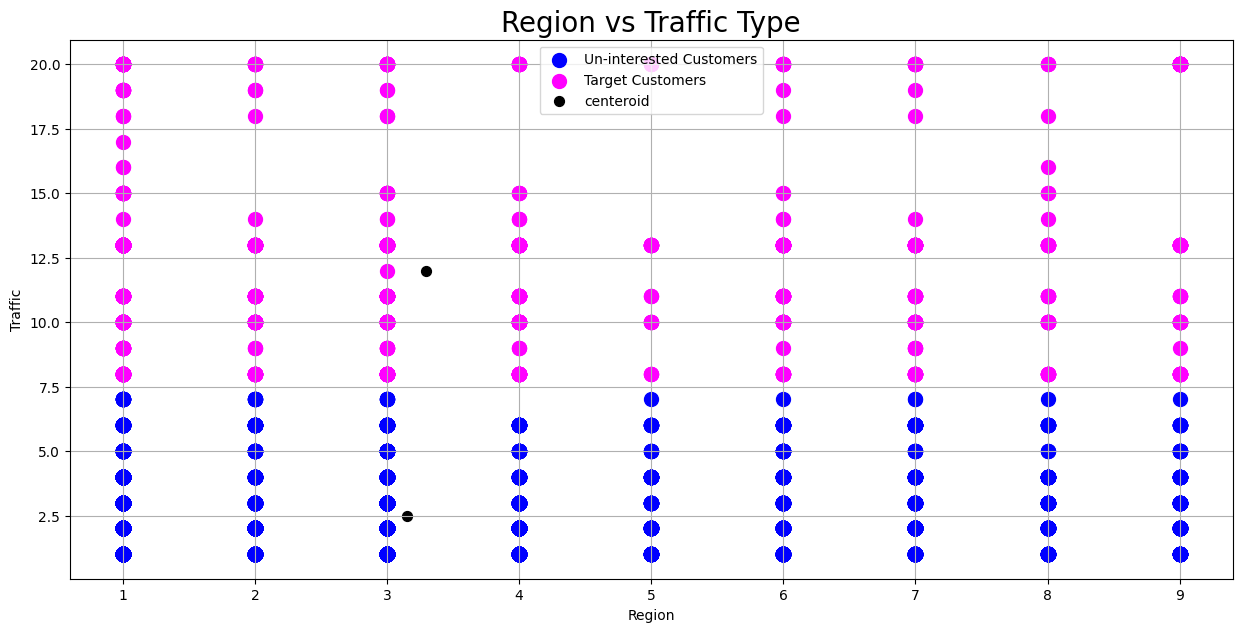

In [82]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'blue', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'magenta', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'k' , label = 'centeroid')

plt.title('Region vs Traffic Type', fontsize = 20)
plt.grid()
plt.xlabel('Region')
plt.ylabel('Traffic')
plt.legend()
plt.show()

### 2. Administrative Duration vs Region

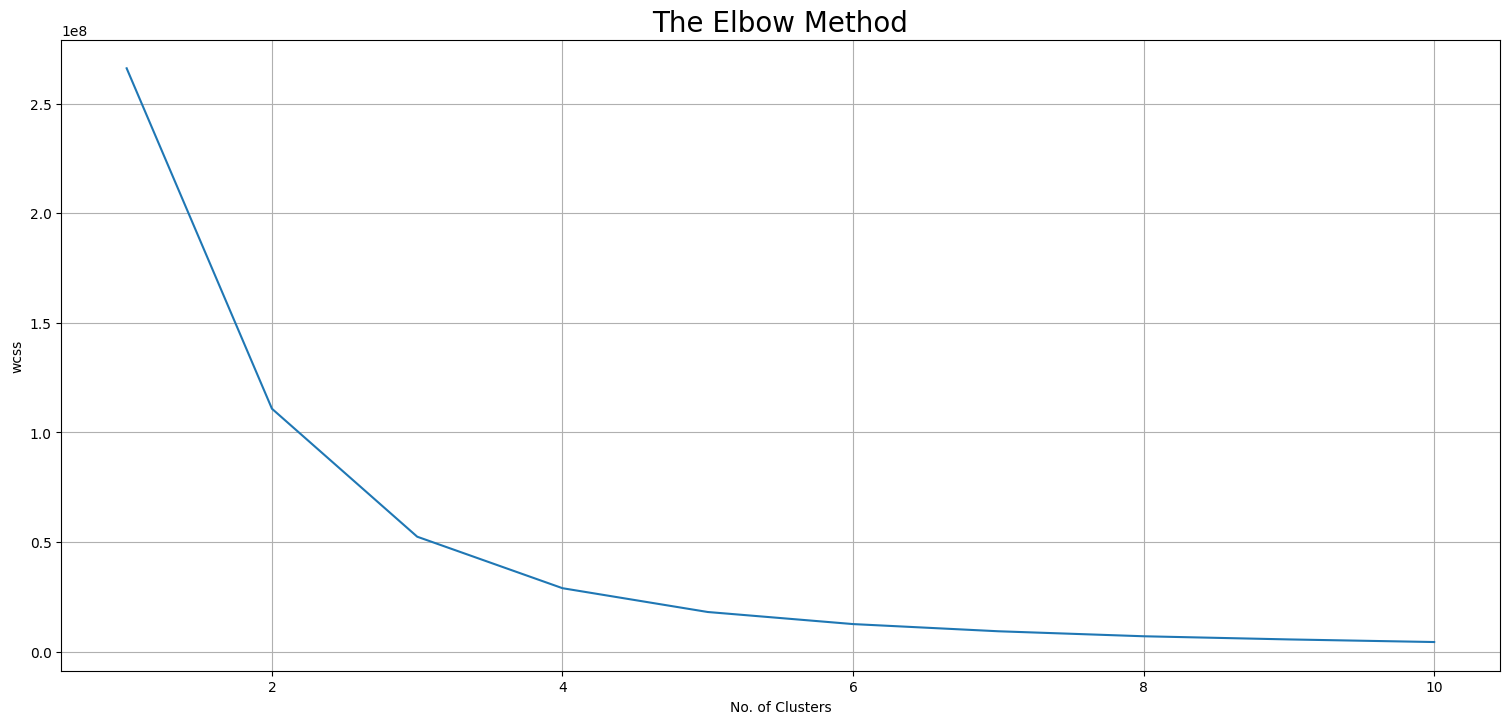

In [83]:
# informational duration vs Bounce Rates
x = shopper.iloc[:, [1, 13]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

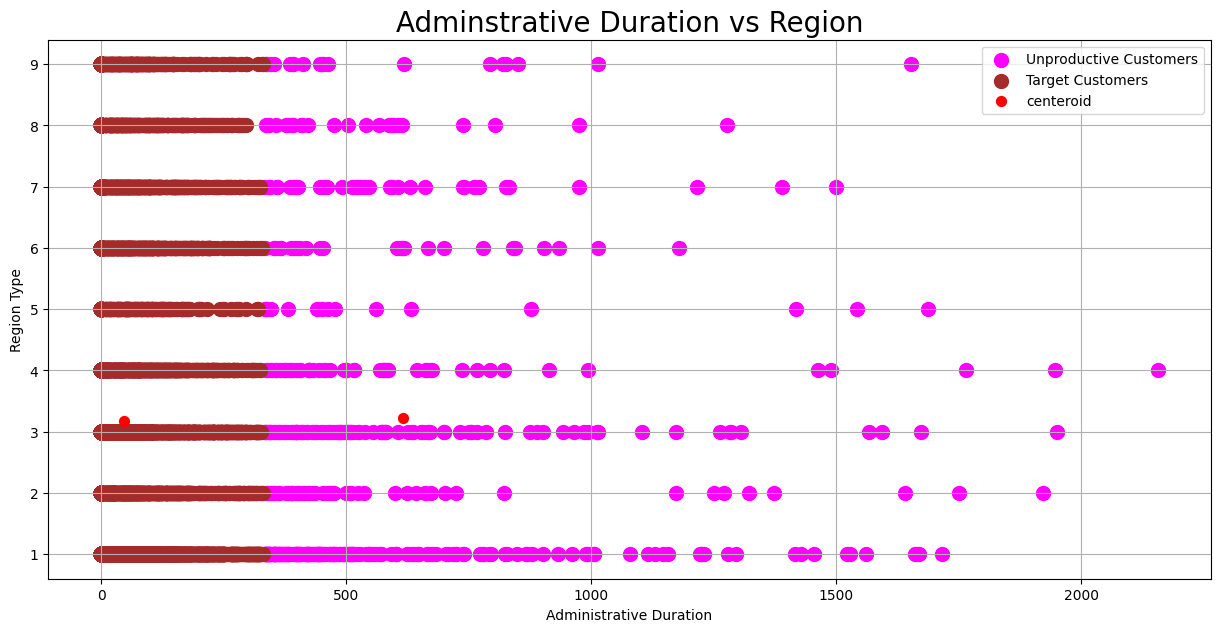

In [86]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'magenta', label = 'Unproductive Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'brown', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'red' , label = 'centeroid')

plt.title('Adminstrative Duration vs Region', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Region Type')
plt.legend()
plt.show()

### ANALIZE PRODUCT RELATED

In [28]:
num_df.drop(columns = "BounceRates", inplace=True)
num_df.drop(columns = "ExitRates", inplace=True)

><font color=blue>To analyse the product page category, we filter for the columns where the Administrative and Informational category are not included (meaning the values for them are 0) and store them in ``product_df``

In [29]:
filt_adm = num_df['Administrative'] == 0
filt_info = num_df['Informational'] == 0
filt_pdt = num_df['ProductRelated'] != 0
product_df = num_df[filt_adm & filt_info & filt_pdt]

><font color=red>Normalization of values takes place here to prepare the dataframe ``product_dfn`` to carry out k-means clustering.

In [52]:
product_dfn = product_df[['ProductRelated','ProductRelated_Duration','Revenue']]
product_dfn = (product_normal_df - product_normal_df.min()) / (product_normal_df.max() - product_normal_df.min())
product_dfn.columns = ['ProductRelated_New', 'ProductRelated_Duration_New', 'Revenue_New']
product_dfn.head()

,ProductRelated_New,ProductRelated_Duration_New,Revenue_New
0,0.000000,0.000295,0.0
1,0.006711,0.019170,0.0
2,0.000000,0.000000,0.0
3,0.006711,0.001081,0.0
4,0.060403,0.185354,0.0


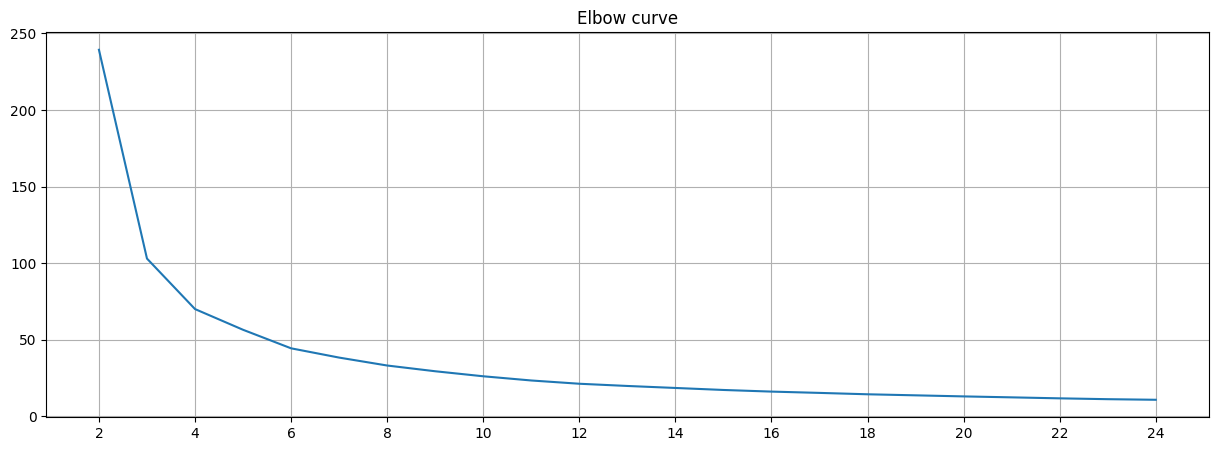

In [53]:
X = product_dfn # Numerical dataframe
distorsions = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 25), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.xticks(np.arange(2,25,2))
plt.show()

><font color=blue>The elbow curve looks at the <b>percentage of variance</b> explained as a <b>function of the number of clusters</b>. I decided that the ideal cluster no. is 6. k = 6 is also when the curve starts to plateau.

In [54]:
k = 6
# Initialise Number Of Clusters
model = KMeans(n_clusters=k,  
               random_state=42) # default state of randomness

# DataFrame of the variables
pd_kmeans = model.fit(product_dfn) 
print(pd_kmeans)

KMeans(n_clusters=6, random_state=42)


><font color=red> Great! Now that we created the dataframe of the variables, we use ``.labels_`` to add the cluster no. to each row. 

In [55]:
product_dfn['Clustering'] = pd_kmeans.labels_
product_dfn.sort_values(by = 'Clustering', ascending=True).tail()

,ProductRelated_New,ProductRelated_Duration_New,Revenue_New,Clustering
1041,0.174497,0.249646,0.0,5
8973,0.120805,0.152766,0.0,5
8969,0.033557,0.140183,0.0,5
2169,0.134228,0.105948,0.0,5
7807,0.046980,0.213052,0.0,5


In [56]:
# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

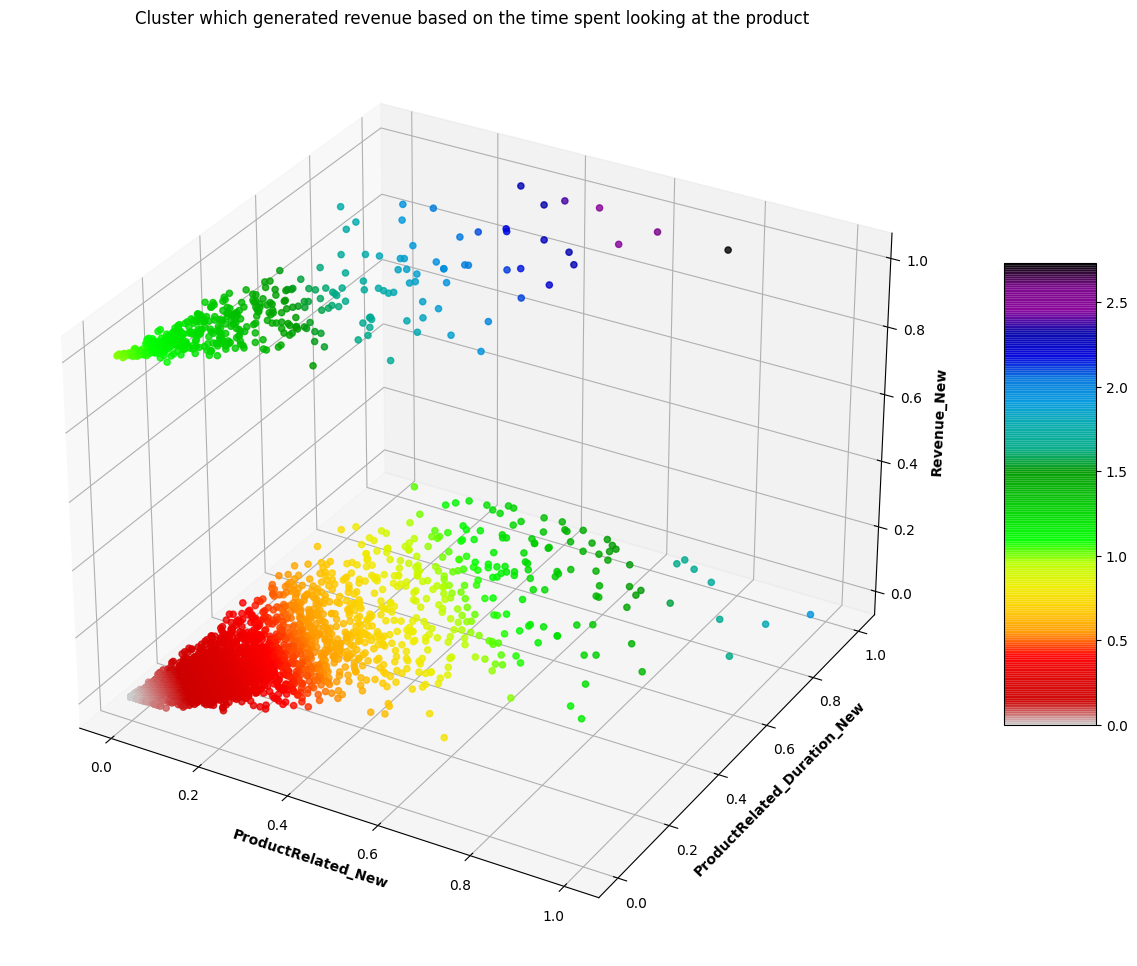

In [100]:
# Creating dataset 
z = product_dfn['Revenue_New']
x = product_dfn['ProductRelated_New']
y = product_dfn['ProductRelated_Duration_New']
  
# Creating figure 
fig = plt.figure(figsize = (18, 12)) 
ax = plt.axes(projection ="3d") 
    
# Add x, y gridlines  
ax.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.3,  
        alpha = 0.2)  

# Creating color map 
my_cmap = plt.get_cmap('nipy_spectral_r') 
  
# Creating plot 
sctt = ax.scatter3D(x, y, z, 
                    alpha = 0.8, 
                    c = (x + y + z),  
                    cmap = my_cmap,  
                    marker ='o') 
  
plt.title("Cluster which generated revenue based on the time spent looking at the product") 
ax.set_xlabel('ProductRelated_New', fontweight ='bold')  
ax.set_ylabel('ProductRelated_Duration_New', fontweight ='bold')  
ax.set_zlabel('Revenue_New', fontweight ='bold') 
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
  
# show plot 
plt.show()

> <font color=blue>Above is the visualization of the individual clusters and how they are positioned on the graph. <b>Using clustering, we can identify segments of customers to target the potential user base</b>. <br> From what we can observe, the clusters are divided neatly into 2, the top cluster with value of 1 for revenue (revenue generated) and the bottom cluster (revenue no generated). 

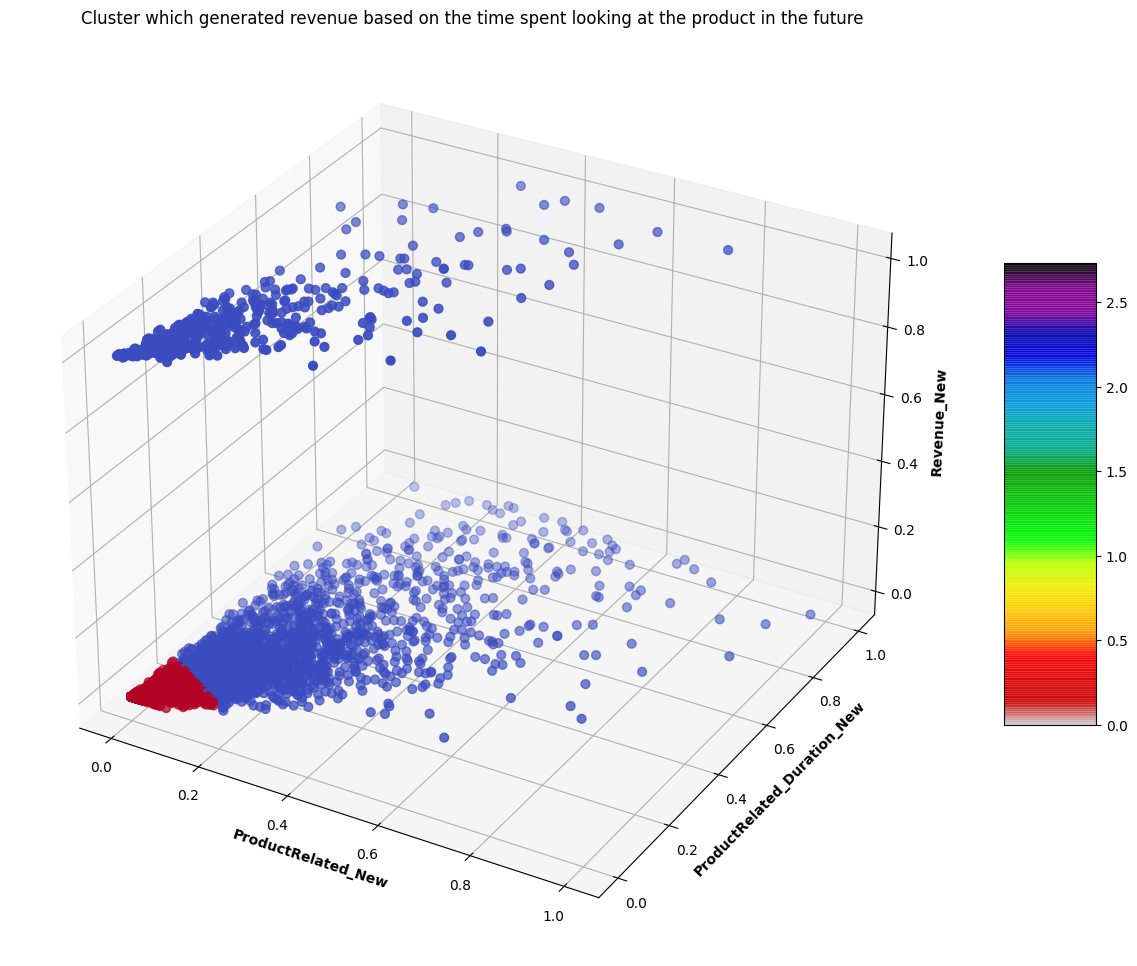

In [99]:
# Creating dataset 
z = product_dfn['Revenue_New']
x = product_dfn['ProductRelated_New']
y = product_dfn['ProductRelated_Duration_New']
  
# Creating figure 
fig = plt.figure(figsize = (18, 12)) 
ax = plt.axes(projection ="3d") 
ax.scatter(x,y,z, marker="o", c=product_dfn['Clustering'] == 1, s=40,cmap="coolwarm")
    
# Add x, y gridlines  
ax.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.3,  
        alpha = 0.2)  
  
plt.title("Cluster which generated revenue based on the time spent looking at the product in the future") 
ax.set_xlabel('ProductRelated_New', fontweight ='bold')  
ax.set_ylabel('ProductRelated_Duration_New', fontweight ='bold')  
ax.set_zlabel('Revenue_New', fontweight ='bold') 
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
  
# show plot 
plt.show()

> <font color=blue> The cluster that is most likely to yield revenue would be the top cluster (Cluster 1) that has a low number of page views and duration. I think it makes sense that users who are satisfied with the product would not spent time hesitating whether to buy the product, because they already decided to choosen buy.

In [88]:
ori_df = pd.concat([product_dfn, shopper], axis=1).reindex(product_dfn.index)
ori_df.head()

,ProductRelated_New,ProductRelated_Duration_New,Revenue_New,Clustering,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,...,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.000000,0.000295,0.0,1.0,0,0.0,0,0.0,1,0.000000,...,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0.006711,0.019170,0.0,1.0,0,0.0,0,0.0,2,64.000000,...,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0.000000,0.000000,0.0,1.0,0,-1.0,0,-1.0,1,-1.000000,...,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0.006711,0.001081,0.0,1.0,0,0.0,0,0.0,2,2.666667,...,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0.060403,0.185354,0.0,5.0,0,0.0,0,0.0,10,627.500000,...,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0


><font color=red>We should also delete the columns that are unneccessary. 

In [91]:
cluster1 = ori_df['Clustering'] == 1

cluster1_ori_df = ori_df[cluster1]
cluster1_ori_df
cluster1_ori_df.drop(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                           'ProductRelated', 'ProductRelated_Duration', 'ProductRelated_New', 'ProductRelated_Duration_New',
                           'Revenue_New', 'Revenue'], axis = 1, inplace=True) 
cluster1_ori_df.shape
# Reduced the df to 12 columns

(2801, 12)

In [93]:
cluster1_ori_df.head()

,Clustering,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,1.0,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,1.0,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,1.0,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,1.0,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
5,1.0,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False


In [94]:
cluster1_ori_df.groupby('VisitorType').size()

VisitorType
New_Visitor           183
Other                  36
Returning_Visitor    2582
dtype: int64

In [95]:
cluster1_ori_df['PageValues'].mean()

0.06524019973652267

> <font color=blue>The average page value for the cluster is 0.06. 

In [ ]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
x = np.array(product_normal_df['NProductRelated'])
y = np.array(product_normal_df['NProductRelated_Duration'])
z = np.array(product_normal_df['NRevenue'])

ax.scatter(x,y,z, marker="o", c=product_normal_df["Cluster"] == 2, s=40, cmap="coolwarm", alpha = 0.4)

ax.set_xlabel('ProductRelated', fontsize = 10)
ax.set_ylabel('ProductRelated_Duration', fontsize = 10)
ax.set_zlabel('Revenue', fontsize = 10)

plt.title('Which cluster is unlikely to yield revenue in the future?', loc='center',pad=30, fontsize=15)
plt.show()

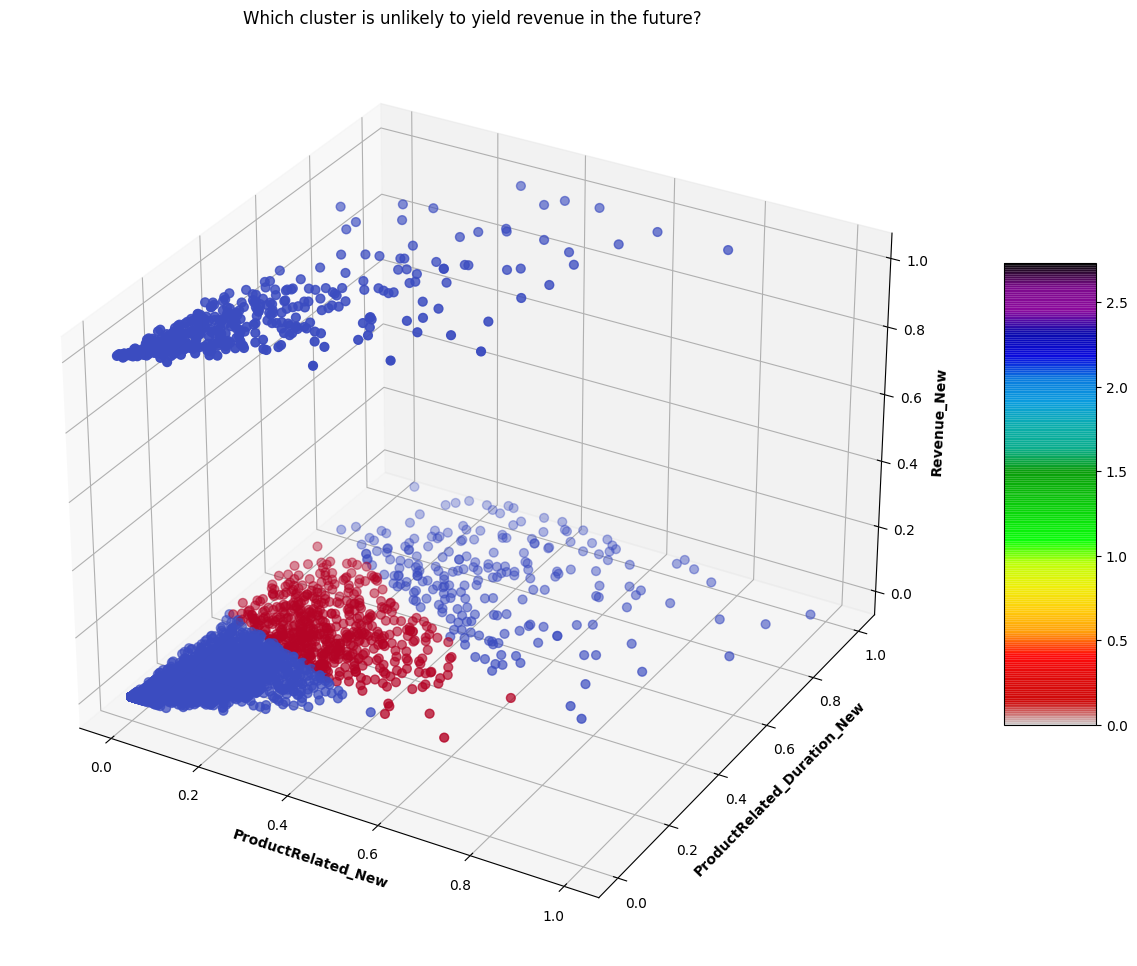

In [101]:
# Creating dataset 
z = product_dfn['Revenue_New']
x = product_dfn['ProductRelated_New']
y = product_dfn['ProductRelated_Duration_New']
  
# Creating figure 
fig = plt.figure(figsize = (18, 12)) 
ax = plt.axes(projection ="3d") 
ax.scatter(x,y,z, marker="o", c=product_dfn['Clustering'] == 2, s=40,cmap="coolwarm")
    
# Add x, y gridlines  
ax.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.3,  
        alpha = 0.2)  
  
plt.title("Which cluster is unlikely to yield revenue in the future?") 
ax.set_xlabel('ProductRelated_New', fontweight ='bold')  
ax.set_ylabel('ProductRelated_Duration_New', fontweight ='bold')  
ax.set_zlabel('Revenue_New', fontweight ='bold') 
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
  
# show plot 
plt.show()

> <font color=blue>To further improve the quality of products that are sold on the site, it is <b>important that we look at the products that are doing poorly</b>. What causes them to perform poorly? The cluster (Cluster 2) that is most unlikely to yield revenue tells us that these products may need revampment or there may be underlying issues that are causing them to perform poorly. Regardless, we should explore why this is happening. 

## Additional Analysis

<font color=green>Filter for cluster 2 dataframe

In [104]:
cluster2 = ori_df['Clustering'] == 2

cluster2_ori_df = ori_df[cluster2]
cluster2_ori_df.shape

(511, 22)

In [105]:
cluster2_ori_df.tail()

,ProductRelated_New,ProductRelated_Duration_New,Revenue_New,Clustering,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,...,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
11200,0.127517,0.590667,0.0,2.0,0,0.0,0,0.0,20,2001.833333,...,0.000000,0.0,Nov,2,2,9,6,Returning_Visitor,False,0
11203,0.261745,0.426696,0.0,2.0,0,0.0,0,0.0,40,1445.840909,...,0.000000,0.0,Nov,3,2,6,8,Returning_Visitor,True,0
11215,0.147651,0.419916,0.0,2.0,0,0.0,0,0.0,23,1422.850000,...,0.000000,0.0,Nov,2,2,7,1,Returning_Visitor,False,0
11226,0.255034,0.344939,0.0,2.0,0,0.0,0,0.0,39,1168.619841,...,0.000000,0.0,Nov,1,1,4,3,Returning_Visitor,False,0
11237,0.134228,0.333132,0.0,2.0,0,0.0,0,0.0,21,1128.583333,...,3.685401,0.0,Dec,2,2,1,2,Returning_Visitor,False,0


In [106]:
print(cluster2_ori_df.groupby('VisitorType').size())
print(cluster2_ori_df['PageValues'].mean())

VisitorType
New_Visitor           33
Other                  1
Returning_Visitor    477
dtype: int64
0.9005491203209394


> <font color=blue>A quick glance at the breakdown of visitor types show us that there is a <b>proportionately high number of returning visitors</b> 

In [107]:
interesting_df = cluster2_ori_df[cluster2_ori_df['VisitorType'] == 'Returning_Visitor']
interesting_df.head()

,ProductRelated_New,ProductRelated_Duration_New,Revenue_New,Clustering,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,...,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
94,0.033557,0.462280,0.0,2.0,0,0.0,0,0.0,6,1566.500000,...,0.0,0.2,Feb,1,1,1,3,Returning_Visitor,False,0
113,0.134228,0.338367,0.0,2.0,0,0.0,0,0.0,21,1146.333333,...,0.0,0.8,Feb,3,2,1,3,Returning_Visitor,False,0
123,0.053691,0.365499,0.0,2.0,0,0.0,0,0.0,9,1238.333333,...,0.0,0.4,Feb,2,2,1,3,Returning_Visitor,False,0
130,0.033557,0.595189,0.0,2.0,0,0.0,0,0.0,6,2017.166667,...,0.0,0.8,Feb,2,2,4,3,Returning_Visitor,False,0
145,0.181208,0.363405,0.0,2.0,0,0.0,0,0.0,28,1231.233333,...,0.0,0.0,Feb,1,1,4,3,Returning_Visitor,False,0


> <font color=blue> From the attribute description, we know that exit rates and bounce rates are factors that can tell us whether the pages are performing well. It is pecuilar how there are a high number of returning visitors who visit the pages although they don't make any purchases. Why does that occur? Let's find out! 

In [108]:
exitrates_graph = pd.DataFrame(interesting_df.groupby('ExitRates').size()).reset_index()
exitrates_graph.columns = ['ExitRates', 'Value']

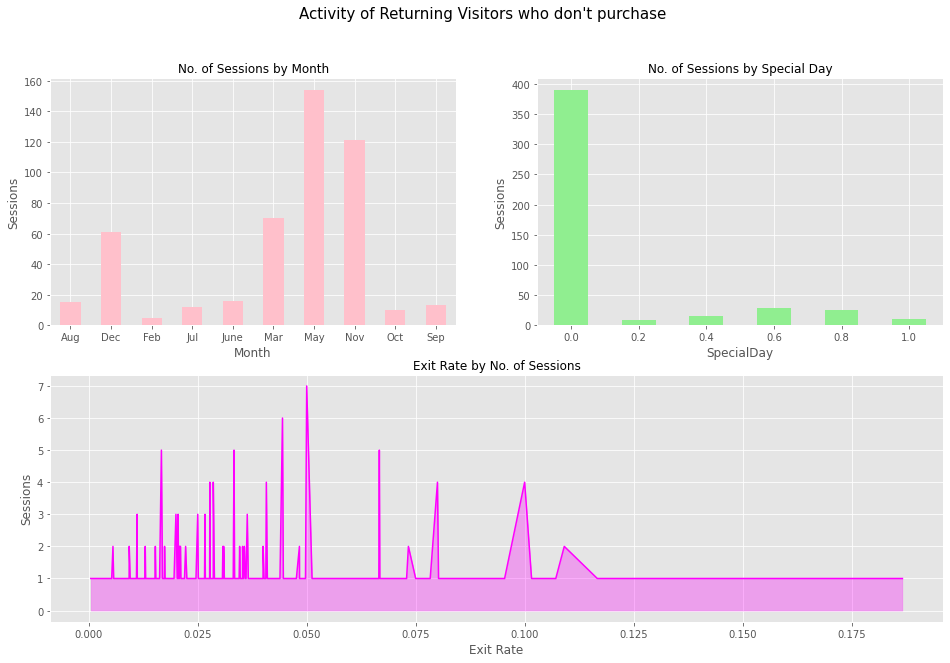

In [113]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('ggplot')
fig_dimensions=(16, 10)
fig = plt.figure(figsize = fig_dimensions)
fig.suptitle('Activity of Returning Visitors who don\'t purchase', fontsize=15)

ax1 = fig.add_subplot(2,2,1)
ax1 = interesting_df.groupby('Month').size().plot(kind = 'bar', color="pink")
plt.xticks(rotation='horizontal')
plt.ylabel('Sessions')
plt.title('No. of Sessions by Month', fontsize=12);

ax2 = fig.add_subplot(2,2,2)
ax2 = interesting_df.groupby('SpecialDay').size().plot(kind = 'bar', color="lightgreen")
plt.xticks(rotation='horizontal')
plt.title('No. of Sessions by Special Day', fontsize=12)
plt.ylabel('Sessions');

ax3 = fig.add_subplot(2,1,2)
ax3 = pd.DataFrame(interesting_df.groupby('ExitRates').size()).reset_index()
ax3.columns = ['ExitRates', 'Value']
plt.fill_between( exitrates_graph['ExitRates'], exitrates_graph['Value'], color="magenta", alpha=0.3)
plt.plot(exitrates_graph['ExitRates'], exitrates_graph['Value'], color="magenta")
plt.title('Exit Rate by No. of Sessions', fontsize=12)
plt.xlabel('Exit Rate')
plt.ylabel('Sessions');

>> <font color=blue>From the graphs above, we can tell that the exit rates is exceptionally high for these returning visitors. The number of sessions by month and by special event do not show us any notable trends either. Special day events happen rarely. Thus, it is normal to observe a high number of sessions for the value 0 (indicating a normal day). <b>A hypothesis would be that these returning visitors are **checking to see if the prices of the products have changed** and naturally, it wouldn't take them long to to check if the price of the product has changed.</b>

<font color=green>Having a high bounce rate and high exit rate could be a sign that a page is experiencing some issues that troubles the user. 

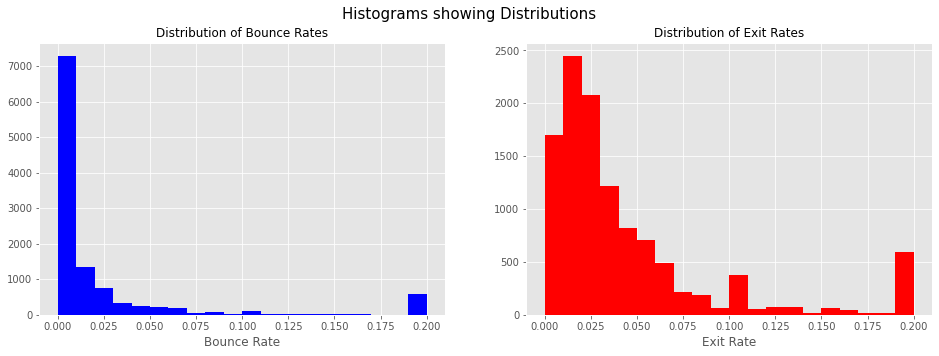

In [116]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('ggplot')

# Set dimensions 
fig_dimensions=(16,5)
fig = plt.figure(figsize = fig_dimensions)
fig.suptitle('Histograms showing Distributions ', fontsize=15)

ax1 = fig.add_subplot(1,2,1)
plt.hist(shopper['BounceRates'], bins=20, color = 'blue')
plt.title('Distribution of Bounce Rates', fontsize=12)
plt.xlabel('Bounce Rate')

ax2 = fig.add_subplot(1,2,2)
plt.hist(shopper['ExitRates'], bins=20, color = 'red')
plt.title('Distribution of Exit Rates', fontsize=12)
plt.xlabel('Exit Rate');

In [118]:
high_exit_rate = shopper['ExitRates'] == 0.2
high_bounce_rate = shopper['BounceRates'] == 0.2

hbhe_df = shopper[high_exit_rate & high_bounce_rate]
hbhe_df.shape

(580, 18)

In [119]:
print(hbhe_df.groupby('Administrative').size())
print(hbhe_df.groupby('Informational').size())
print(hbhe_df.groupby('ProductRelated').size())

Administrative
0    566
1     13
2      1
dtype: int64
Informational
0    574
1      6
dtype: int64
ProductRelated
0      15
1     422
2      86
3      33
4      11
5       6
6       2
7       1
9       1
10      1
11      1
13      1
dtype: int64


In [120]:
low_exit_rate = shopper['ExitRates'] == 0
low_bounce_rate = shopper['BounceRates'] == 0

lble_df = shopper[low_exit_rate & low_bounce_rate]
lble_df.shape

(76, 18)

In [121]:
print(lble_df.groupby('Administrative').size())
print(lble_df.groupby('Informational').size())
print(lble_df.groupby('ProductRelated').size())

Administrative
0    38
1    19
2     5
3     8
4     2
5     2
6     1
7     1
dtype: int64
Informational
0    69
1     3
2     2
6     2
dtype: int64
ProductRelated
1     5
2     5
3     8
4     5
5     3
6     3
7     8
8     3
9     1
10    4
11    4
13    5
14    2
15    2
16    1
17    4
19    2
20    1
21    2
24    1
27    1
29    1
32    1
44    1
47    1
66    1
73    1
dtype: int64


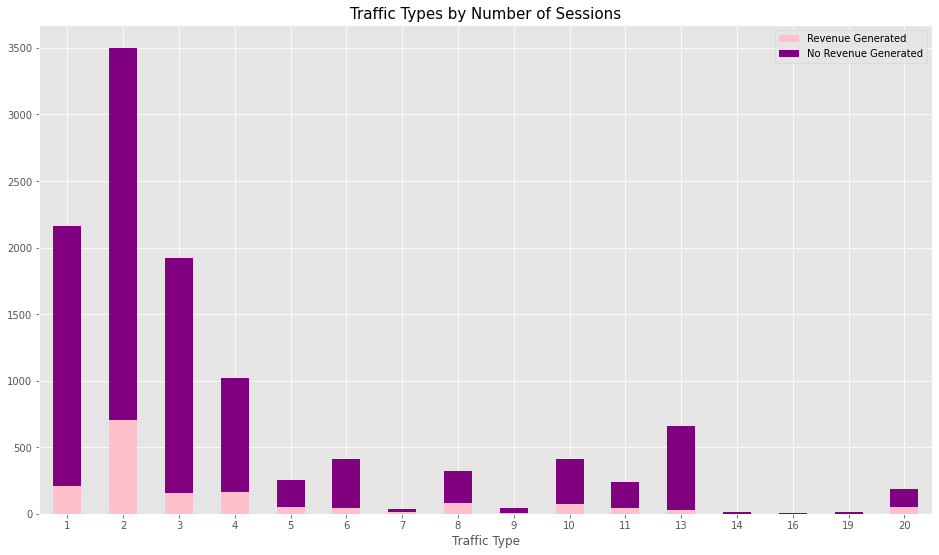

In [128]:
revenue_true = shopper['Revenue'] == 1
true_shopper_df = shopper[revenue_true] 
true_shopper_df = pd.DataFrame(true_shopper_df.groupby('TrafficType').size()).reset_index()
true_shopper_df.columns = ['TrafficType','Revenue Generated']
true_shopper_df

revenue_false = shopper['Revenue'] == 0
false_shopper_df = shopper[revenue_false] 
false_shopper_df = false_shopper_df.groupby('TrafficType').size().reset_index()
false_shopper_df.columns = ['TrafficType', 'No Revenue Generated']
false_shopper_df

traffic_df = true_shopper_df.merge(false_shopper_df, on='TrafficType', how='left')
traffic_df

traffic_df = traffic_df.plot.bar('TrafficType', color = ['pink', 'purple'], stacked = True)
plt.xticks(rotation='horizontal')
plt.title('Traffic Types by Number of Sessions', fontsize=15)
plt.xlabel('Traffic Type')
plt.gcf().set_size_inches(16, 9)
plt.show();

>><font color=blue>From the stacked bar graph shown above, we can tell that the ecommerce website gets most of its traffic from type 1,2 and 3. With traffic type 2 yielding the highest revenue. Another interesting point is traffic type 13 which has a considerably high no. of sessions that do not generate revenue.

In [129]:
num_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
PageValues                 0
SpecialDay                 0
Revenue                    0
dtype: int64

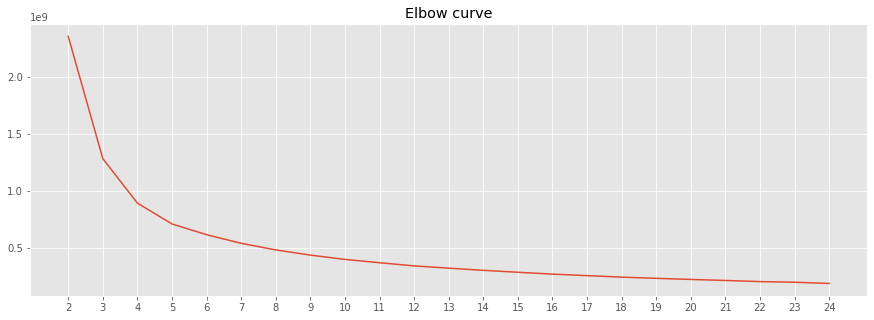

In [130]:
X = num_df
distorsions = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 25), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.xticks(np.arange(2,25))
plt.show()

In [131]:
k = 6
model = KMeans(n_clusters=k,  # < Initialise Number Of Clusters here
               random_state=42) # default state of randomness

revenue_kmeans = model.fit(num_df) # < DataFrame of All Variables
print(revenue_kmeans)

KMeans(n_clusters=6, random_state=42)


In [132]:
num_df['Cluster'] = revenue_kmeans.labels_
num_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,Revenue,Cluster
0,0,0.0,0,0.0,1,0.000000,0.0,0.0,0,0
1,0,0.0,0,0.0,2,64.000000,0.0,0.0,0,0
2,0,-1.0,0,-1.0,1,-1.000000,0.0,0.0,0,0
3,0,0.0,0,0.0,2,2.666667,0.0,0.0,0,0
4,0,0.0,0,0.0,10,627.500000,0.0,0.0,0,3


<font color=blue><b>Clustering Analysis</b>

In [134]:
cluster_z = pd.DataFrame(num_df.groupby(['Cluster']).size()).reset_index()
cluster_z.columns = ['Cluster', 'Size']
cluster_z

,Cluster,Size
0,0,4071
1,1,889
2,2,1780
3,3,2575
4,4,1324
5,5,609


In [138]:
proportion = pd.DataFrame(num_df.groupby(['Revenue', 'Cluster']).size())

proportion = ((proportion / proportion.groupby(level=0).sum()) * 100).round(3).unstack(0)
proportion.columns = ['% revenue generated', '% of no revenue generated']
proportion.reset_index()
proportion.style.background_gradient(cmap='gist_rainbow_r')

,% revenue generated,% of no revenue generated
Cluster,,
0,39.869000,14.330000
1,7.207000,12.044000
2,14.591000,23.162000
3,22.495000,25.263000
4,10.956000,16.615000
5,4.881000,8.586000


>><font color=green>From these 6 clusters, we know that cluster 3 gives the highest amt of revenue generated

<font color=green>Filtering for cluster 2 

In [141]:
cluster0_df = num_df[num_df['Cluster'] == 0]
cluster0_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,Revenue,Cluster
0,0,0.0,0,0.0,1,0.000000,0.0,0.0,0,0
1,0,0.0,0,0.0,2,64.000000,0.0,0.0,0,0
2,0,-1.0,0,-1.0,1,-1.000000,0.0,0.0,0,0
3,0,0.0,0,0.0,2,2.666667,0.0,0.0,0,0
5,0,0.0,0,0.0,19,154.216667,0.0,0.0,0,0


In [142]:
cluster0_df.groupby(['Revenue']).size()

Revenue
0    3839
1     232
dtype: int64

>><font color=blue>From this we know that the k-means clustering algorithm is limited in its effectiveness when we use too many variables. Although cluster 2 gives the highest amount of revenue, it has a proportionately large number of observations that give no revenue as well. 

# INSIGHT

1. Bounce rates are strongly correlated with exit rates.
2. PageValue is one of the most significant features that lead to revenue.
3. Returning visitors are checking to see if the prices of the products have changed. We can closely monitor the changes to these products. 
4. The website gets most of its traffic from type 1,2 and 3.
5. Traffic type 2 yields the highest revenue of all channels. 
6. Traffic type 13 has a considerably high no. of sessions that do not generate revenue. 